In [74]:
import requests
import math
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio

In [ ]:
#Pyrmont
'http://157.90.199.50:50002
#Prater
'http://95.217.105.14:50002'

In [4]:
x = requests.request('GET', 'http://157.90.199.50:50002/eth/v1/beacon/genesis') 
y = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/genesis')

print(x.json())
print(y.json())

{'data': {'genesis_time': '1605700807', 'genesis_validators_root': '0x9436e8a630e3162b7ed4f449b12b8a5a368a4b95bc46b941ae65c11613bfa4c1', 'genesis_fork_version': '0x00002009'}}
{'data': {'genesis_time': '1616508000', 'genesis_validators_root': '0x043db0d9a83813551ee2f33450d23797757d430911a9320530ad8a0eabc43efb', 'genesis_fork_version': '0x00001020'}}


## Prater

In [20]:
prater_start = 40800
prater_end = 40970

prater_validators = []
for i in range(prater_start, prater_end+1):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i*32)))
    prater_validators.append(x.json()['data']['validators'])

prater_bits = []
for i in range(prater_start, prater_end+1):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i*32)))
    if 'data' in x.json():
        prater_bits.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits.append('No Block At Slot')

In [22]:
with open("prater_validators.txt", "w") as output:
    output.write(str(prater_validators))
with open("prater_bits.txt", "w") as output:
    output.write(str(prater_bits))

In [122]:
def decoding(ini_string):
# Code to convert hex to binary
    n = int(ini_string, 16) 
    bStr = ''
    while n > 0:
        bStr = str(n % 2) + bStr
        n = n >> 1    
    res = bStr
    ret = ''
    for i in range(0,len(bStr) +1, 8):
        temp = bstr[i:i+8]
        ret = ret + temp[::-1]
    return ret

In [124]:
prater_bits_decoded = []
for i in prater_bits:
    if i == 'No Block At Slot':
        prater_bits_decoded.append(i)
    else:
        prater_bits_decoded.append(decoding(str(i)))

In [126]:
freq_dict = {}

for i in range(len(prater_bits)):
    if prater_bits_decoded[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded[i])):
            if prater_bits_decoded[i][j] == '0':
                if prater_validators[i][j] in freq_dict:
                    freq_dict[prater_validators[i][j]] += 1
                else:
                    freq_dict[prater_validators[i][j]] = 1

In [127]:
freq_df = pd.DataFrame(freq_dict.items(), columns=['Validator index', 'Number of missed/incorrect sync'])
freq_df

,Validator index,Number of missed/incorrect sync
0,204380,138
1,217704,138
2,174807,131
3,15163,131
4,194298,131
...,...,...
345,161783,9
346,123876,9
347,68389,9
348,80524,9


In [128]:
client_df = pd.read_csv('prater_client_map.csv')
client = client_df.set_index('Validator index')['Client'].to_dict()

client_list = []

for i in freq_df['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')

In [129]:
freq_df['Client'] = client_list
freq_df

,Validator index,Number of missed/incorrect sync,Client
0,204380,138,Unknown
1,217704,138,Unknown
2,174807,131,nimbus
3,15163,131,teku
4,194298,131,nimbus
...,...,...,...
345,161783,9,nimbus
346,123876,9,teku
347,68389,9,prysm
348,80524,9,lighthouse


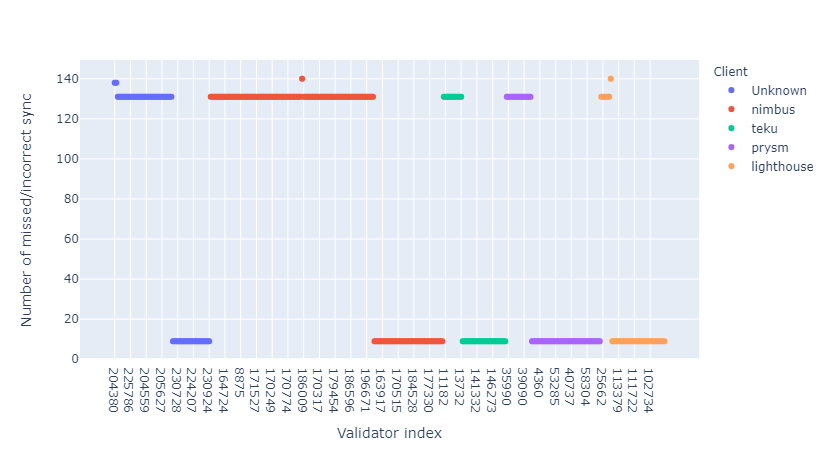

In [130]:
px.scatter(freq_df, x = 'Validator index', y = 'Number of missed/incorrect sync', color = 'Client')

In [131]:
df_pruned = freq_df[['Number of missed/incorrect sync','Client']]
df_pruned_grouped = df_pruned.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped

Client
Unknown        5077
lighthouse     1232
nimbus        14029
prysm          2492
teku           1824
Name: Number of missed/incorrect sync, dtype: int64

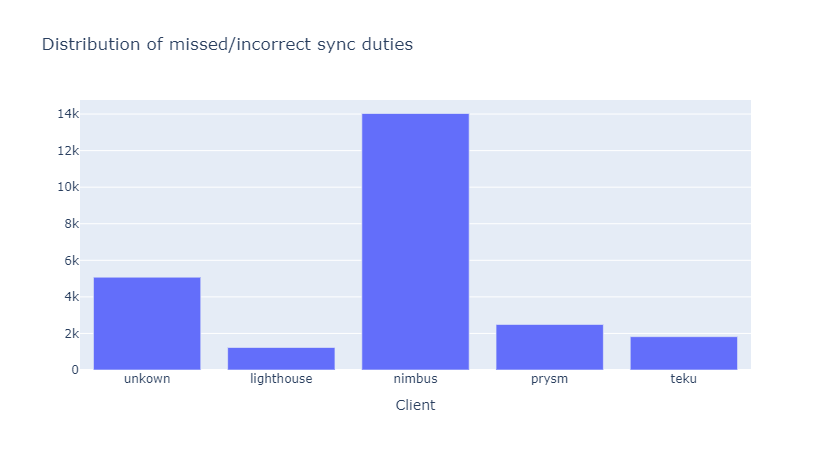

In [133]:
px.bar(y = df_pruned_grouped, x = ['unkown','lighthouse', 'nimbus', 'prysm', 'teku'], title="Distribution of missed/incorrect sync duties", labels = {'y': "", 'x': 'Client'})


### Over time analysis

In [137]:
prater_start = 41095
prater_end = 41195

prater_validatros_1 = []
prater_validators_2 = []
prater_validators_3 = []
prater_validators_4 = []
prater_validators_5 = []
prater_validators_6= []
prater_validators_7= []
prater_validators_8 = []
prater_validators_9 = []
prater_validators_10 = []

for i in range((prater_start)*32, (prater_start+1)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_1.append(x.json()['data']['validators'])
for i in range((prater_start+1)*32, (prater_start+2)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_2.append(x.json()['data']['validators'])
for i in range((prater_start+2)*32, (prater_start+3)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_3.append(x.json()['data']['validators'])
for i in range((prater_start+3)*32, (prater_start+4)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_4.append(x.json()['data']['validators'])
for i in range((prater_start+4)*32, (prater_start+5)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_5.append(x.json()['data']['validators'])
for i in range((prater_start+5)*32, (prater_start+6)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_6.append(x.json()['data']['validators'])
for i in range((prater_start+6)*32, (prater_start+7)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_7.append(x.json()['data']['validators'])
for i in range((prater_start+7)*32, (prater_start+8)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_8.append(x.json()['data']['validators'])
for i in range((prater_start+8)*32, (prater_start+9)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_9.append(x.json()['data']['validators'])
for i in range((prater_start+9)*32, (prater_start+10)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/states/{}/sync_committees'.format(str(i)))
    prater_validators_10.append(x.json()['data']['validators'])
    
prater_bits_1 = []
prater_bits_2 = []
prater_bits_3 = []
prater_bits_4 = []
prater_bits_5 = []
prater_bits_6 = []
prater_bits_7 = []
prater_bits_8 = []
prater_bits_9 = []
prater_bits_10 = []

for i in range((prater_start)*32, (prater_start+1)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_1.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_1.append('No Block At Slot')
for i in range((prater_start+1)*32, (prater_start+2)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_2.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_2.append('No Block At Slot')
for i in range((prater_start+2)*32, (prater_start+3)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_3.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_3.append('No Block At Slot')
for i in range((prater_start+3)*32, (prater_start+4)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_4.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_4.append('No Block At Slot')
for i in range((prater_start+4)*32, (prater_start+5)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_5.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_5.append('No Block At Slot')
for i in range((prater_start+5)*32, (prater_start+6)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_6.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_6.append('No Block At Slot')
for i in range((prater_start+6)*32, (prater_start+7)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_7.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_7.append('No Block At Slot')
for i in range((prater_start+7)*32, (prater_start+8)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_8.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_8.append('No Block At Slot')
for i in range((prater_start+8)*32, (prater_start+9)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_9.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_9.append('No Block At Slot')
for i in range((prater_start+9)*32, (prater_start+10)*32):
    x = requests.request('GET', 'http://95.217.105.14:50002/eth/v1/beacon/blocks/{}'.format(str(i)))
    if 'data' in x.json():
        prater_bits_10.append(x.json()['data']['message']['body']['sync_aggregate']['sync_committee_bits'])
    else:
        prater_bits_10.append('No Block At Slot')

In [138]:
prater_bits_decoded_1 = []
for i in prater_bits_1:
    if i == 'No Block At Slot':
        prater_bits_decoded_1.append(i)
    else:
        prater_bits_decoded_1.append(decoding(str(i)))
        
prater_bits_decoded_2 = []
for i in prater_bits_2:
    if i == 'No Block At Slot':
        prater_bits_decoded_2.append(i)
    else:
        prater_bits_decoded_2.append(decoding(str(i)))
        
prater_bits_decoded_3 = []
for i in prater_bits_3:
    if i == 'No Block At Slot':
        prater_bits_decoded_3.append(i)
    else:
        prater_bits_decoded_3.append(decoding(str(i)))
        
prater_bits_decoded_4 = []
for i in prater_bits_4:
    if i == 'No Block At Slot':
        prater_bits_decoded_4.append(i)
    else:
        prater_bits_decoded_4.append(decoding(str(i)))
        
prater_bits_decoded_5 = []
for i in prater_bits_5:
    if i == 'No Block At Slot':
        prater_bits_decoded_5.append(i)
    else:
        prater_bits_decoded_5.append(decoding(str(i)))
        
prater_bits_decoded_6 = []
for i in prater_bits_6:
    if i == 'No Block At Slot':
        prater_bits_decoded_6.append(i)
    else:
        prater_bits_decoded_6.append(decoding(str(i)))
        
prater_bits_decoded_7 = []
for i in prater_bits_7:
    if i == 'No Block At Slot':
        prater_bits_decoded_7.append(i)
    else:
        prater_bits_decoded_7.append(decoding(str(i)))
        
prater_bits_decoded_8 = []
for i in prater_bits_8:
    if i == 'No Block At Slot':
        prater_bits_decoded_8.append(i)
    else:
        prater_bits_decoded_8.append(decoding(str(i)))
        
prater_bits_decoded_9 = []
for i in prater_bits_9:
    if i == 'No Block At Slot':
        prater_bits_decoded_9.append(i)
    else:
        prater_bits_decoded_9.append(decoding(str(i)))
        
prater_bits_decoded_10 = []
for i in prater_bits_10:
    if i == 'No Block At Slot':
        prater_bits_decoded_10.append(i)
    else:
        prater_bits_decoded_10.append(decoding(str(i)))

In [167]:
freq_dict_1 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_1[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_1[i])):
            if prater_bits_decoded_1[i][j] == '0':
                if prater_validators_1[i][j] in freq_dict_1:
                    freq_dict_1[prater_validators_1[i][j]] += 1
                else:
                    freq_dict_1[prater_validators_1[i][j]] = 1
                
freq_df_1 = pd.DataFrame(freq_dict_1.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_2 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_2[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_2[i])):
            if prater_bits_decoded_2[i][j] == '0':
                if prater_validators_2[i][j] in freq_dict_2:
                    freq_dict_2[prater_validators_2[i][j]] += 1
                else:
                    freq_dict_2[prater_validators_2[i][j]] = 1
                
freq_df_2 = pd.DataFrame(freq_dict_2.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_3 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_3[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_3[i])):
            if prater_bits_decoded_3[i][j] == '0':
                if prater_validators_3[i][j] in freq_dict_3:
                    freq_dict_3[prater_validators_3[i][j]] += 1
                else:
                    freq_dict_3[prater_validators_3[i][j]] = 1
                
freq_df_3 = pd.DataFrame(freq_dict_3.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_4 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_4[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_4[i])):
            if prater_bits_decoded_4[i][j] == '0':
                if prater_validators_4[i][j] in freq_dict_4:
                    freq_dict_4[prater_validators_4[i][j]] += 1
                else:
                    freq_dict_4[prater_validators_4[i][j]] = 1
                
freq_df_4 = pd.DataFrame(freq_dict_4.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_5 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_5[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_5[i])):
            if prater_bits_decoded_5[i][j] == '0':
                if prater_validators_5[i][j] in freq_dict_5:
                    freq_dict_5[prater_validators_5[i][j]] += 1
                else:
                    freq_dict_5[prater_validators_5[i][j]] = 1
                
freq_df_5 = pd.DataFrame(freq_dict_5.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_6 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_6[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_6[i])):
            if prater_bits_decoded_6[i][j] == '0':
                if prater_validators_6[i][j] in freq_dict_6:
                    freq_dict_6[prater_validators_6[i][j]] += 1
                else:
                    freq_dict_6[prater_validators_6[i][j]] = 1
                
freq_df_6 = pd.DataFrame(freq_dict_6.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_7 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_7[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_7[i])):
            if prater_bits_decoded_7[i][j] == '0':
                if prater_validators_7[i][j] in freq_dict_7:
                    freq_dict_7[prater_validators_7[i][j]] += 1
                else:
                    freq_dict_7[prater_validators_7[i][j]] = 1
                
freq_df_7 = pd.DataFrame(freq_dict_7.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_8 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_8[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_8[i])):
            if prater_bits_decoded_8[i][j] == '0':
                if prater_validators_8[i][j] in freq_dict_8:
                    freq_dict_8[prater_validators_8[i][j]] += 1
                else:
                    freq_dict_8[prater_validators_8[i][j]] = 1
                
freq_df_8 = pd.DataFrame(freq_dict_8.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_9 = {}

for i in range(len(prater_bits_1)):
    if prater_bits_decoded_9[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_9[i])):
            if prater_bits_decoded_9[i][j] == '0':
                if prater_validators_9[i][j] in freq_dict_9:
                    freq_dict_9[prater_validators_9[i][j]] += 1
                else:
                    freq_dict_9[prater_validators_9[i][j]] = 1
                
freq_df_9 = pd.DataFrame(freq_dict_9.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

freq_dict_10 = {}

for i in range(len(prater_bits_10)):
    if prater_bits_decoded_10[i] == 'No Block At String':
        continue
    else: 
        for j in range(len(prater_bits_decoded_10[i])):
            if prater_bits_decoded_10[i][j] == '0':
                if prater_validators_10[i][j] in freq_dict_10:
                    freq_dict_10[prater_validators_10[i][j]] += 1
                else:
                    freq_dict_10[prater_validators_10[i][j]] = 1
                
freq_df_10 = pd.DataFrame(freq_dict_10.items(), columns=['Validator index', 'Number of missed/incorrect sync'])

In [168]:
client_df = pd.read_csv('prater_client_map.csv')
client = client_df.set_index('Validator index')['Client'].to_dict()

client_list = []

for i in freq_df_1['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_1['Client'] = client_list

client_list = []

for i in freq_df_2['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_2['Client'] = client_list

client_list = []

for i in freq_df_3['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_3['Client'] = client_list

client_list = []

for i in freq_df_4['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_4['Client'] = client_list

client_list = []

for i in freq_df_5['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_5['Client'] = client_list

client_list = []

for i in freq_df_6['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_6['Client'] = client_list

client_list = []

for i in freq_df_7['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_7['Client'] = client_list

client_list = []

for i in freq_df_8['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_8['Client'] = client_list

client_list = []

for i in freq_df_9['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_9['Client'] = client_list

client_list = []

for i in freq_df_10['Validator index']:
    if int(i) in client: 
        client_list.append(client[int(i)])
    else:
        client_list.append('Unknown')
        
freq_df_10['Client'] = client_list

In [170]:
freq_df_10

,Validator index,Number of missed/incorrect sync,Client
0,170215,28,nimbus
1,139350,28,teku
2,97854,28,lighthouse
3,173567,28,nimbus
4,162464,28,nimbus
...,...,...,...
171,161783,28,nimbus
172,123876,28,teku
173,68389,28,prysm
174,80524,28,lighthouse


In [171]:
df_pruned_1 = freq_df_1[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_1 = df_pruned_1.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_1

Client
Unknown        672
lighthouse     980
nimbus        1260
prysm         1232
teku           784
Name: Number of missed/incorrect sync, dtype: int64

In [172]:
df_pruned_2 = freq_df_2[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_2 = df_pruned_2.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_2

Client
Unknown        672
lighthouse     980
nimbus        1260
prysm         1232
teku           784
Name: Number of missed/incorrect sync, dtype: int64

In [173]:
df_pruned_3 = freq_df_3[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_3 = df_pruned_3.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_3

Client
Unknown        720
lighthouse    1048
nimbus        1347
prysm         1318
teku           836
Name: Number of missed/incorrect sync, dtype: int64

In [174]:
df_pruned_4 = freq_df_4[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_4 = df_pruned_4.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_4

Client
Unknown        720
lighthouse    1050
nimbus        1351
prysm         1320
teku           841
Name: Number of missed/incorrect sync, dtype: int64

In [175]:
df_pruned_5 = freq_df_5[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_5 = df_pruned_5.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_5

Client
Unknown        648
lighthouse     945
nimbus        1215
prysm         1188
teku           756
Name: Number of missed/incorrect sync, dtype: int64

In [176]:
df_pruned_6 = freq_df_6[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_6 = df_pruned_6.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_6

Client
Unknown        600
lighthouse     875
nimbus        1125
prysm         1100
teku           700
Name: Number of missed/incorrect sync, dtype: int64

In [177]:
df_pruned_7 = freq_df_7[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_7 = df_pruned_7.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_7

Client
Unknown        744
lighthouse    1085
nimbus        1395
prysm         1364
teku           868
Name: Number of missed/incorrect sync, dtype: int64

In [178]:
df_pruned_8 = freq_df_8[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_8 = df_pruned_8.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_8

Client
Unknown        744
lighthouse    1085
nimbus        1395
prysm         1364
teku           868
Name: Number of missed/incorrect sync, dtype: int64

In [179]:
df_pruned_9 = freq_df_9[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_9 = df_pruned_9.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_9

Client
Unknown        624
lighthouse     910
nimbus        1172
prysm         1144
teku           730
Name: Number of missed/incorrect sync, dtype: int64

In [180]:
df_pruned_10 = freq_df_10[['Number of missed/incorrect sync','Client']]
df_pruned_grouped_10 = df_pruned_10.groupby("Client")['Number of missed/incorrect sync'].sum()
df_pruned_grouped_10

Client
Unknown        672
lighthouse     980
nimbus        1260
prysm         1232
teku           784
Name: Number of missed/incorrect sync, dtype: int64

In [182]:
x = [40800,40801,40802,40803,40804,40805,40806,40807,40808,40809,40810]

y1 = [df_pruned_grouped_1[1], df_pruned_grouped_2[1], df_pruned_grouped_3[1], df_pruned_grouped_4[1], df_pruned_grouped_5[1], df_pruned_grouped_6[1], df_pruned_grouped_7[1], df_pruned_grouped_8[1], df_pruned_grouped_9[1], df_pruned_grouped_10[1]]
y2 = [df_pruned_grouped_1[2], df_pruned_grouped_2[2], df_pruned_grouped_3[2], df_pruned_grouped_4[2], df_pruned_grouped_5[2], df_pruned_grouped_6[2], df_pruned_grouped_7[2], df_pruned_grouped_8[2], df_pruned_grouped_9[2], df_pruned_grouped_10[2]]
y3 = [df_pruned_grouped_1[3], df_pruned_grouped_2[3], df_pruned_grouped_3[3], df_pruned_grouped_4[3], df_pruned_grouped_5[3], df_pruned_grouped_6[3], df_pruned_grouped_7[3], df_pruned_grouped_8[3], df_pruned_grouped_9[3], df_pruned_grouped_10[3]]
y4 = [df_pruned_grouped_1[4], df_pruned_grouped_2[4], df_pruned_grouped_3[4], df_pruned_grouped_4[4], df_pruned_grouped_5[4], df_pruned_grouped_6[4], df_pruned_grouped_7[4], df_pruned_grouped_8[4], df_pruned_grouped_9[4], df_pruned_grouped_10[4]]

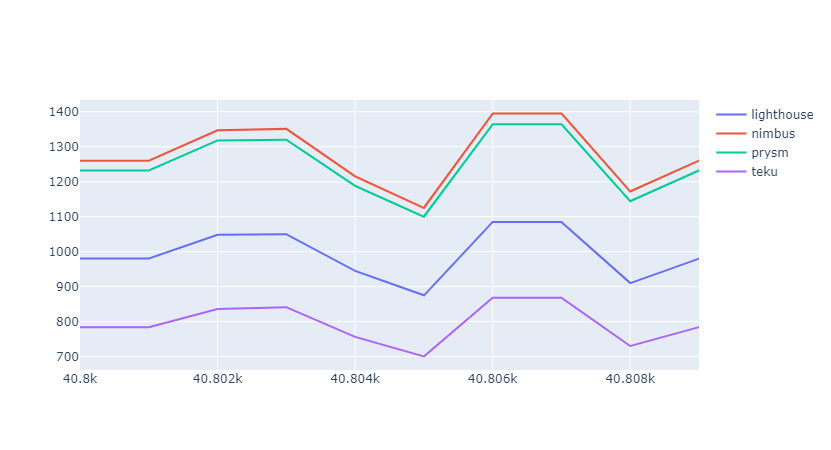

In [184]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=y1,
                    mode='lines',
                    name='lighthouse'))
fig.add_trace(go.Scatter(x=x, y=y2,
                    mode='lines',
                    name='nimbus'))
fig.add_trace(go.Scatter(x=x, y=y3,
                    mode='lines',
                    name='prysm'))
fig.add_trace(go.Scatter(x=x, y=y4,
                    mode='lines',
                    name='teku'))